# Projeto de Credit Score - Árvore de Decisão
---

## Descrição do projeto
Este é o projeto prático do módulo 21 do curso de Ciência de Dados da EBAC.

Neste projeto nós iremos utilizar um modelo de machine learning de Árvore de Decisão para resolver um problema de classificação de dados. Nós utilizaremos como base, dados que contém informações de clientes de um determinado serviço de crédito e temos como objetivo final, classificar a faixa de crédito de cada amostra entre as classes "Alto", "Médio" e "Baixo".

---

## Importando os módulos

Iniciaremos o projeto importando todos os módulos que serão utilizados durante as etapas de desenvolvimento.

In [159]:
# Importando os módulos;
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

---
## Carregando as bases de dados

Para esse projeto nós utilizaremos uma base de dados que já foi tratada, balanceada e devidamente preparada em atividades anteriores, por isso, não serão necessárias as etapas que precedem a criação e aplicação do modelo. Vamos então agora carregar as bases de dados que serão utilizadas para esse projeto.

In [161]:
# Carregando as bases de dados;

# Base de treino;
X_train = pd.read_csv("../dados/X_train_balanced")
y_train = pd.read_csv("../dados/y_train_balanced")

# Base de teste;
X_test = pd.read_csv("../dados/X_test")
y_test = pd.read_csv("../dados/y_test")

---
### Aplicação de um modelo de Árvore de Decisão

O modelo de Árvore de Decisão, assim como todos os outros modelos de ML é uma ferramenta, e assim como qualquer ferramenta tem como objetivo final ajudar a resolver um problema. Vamos usar como exemplo esse projeto que estamos desenvolvendo! Nós estamos lidando com um problema de classificação de dados e para chegarmos ao objetivo final nós temos que seguir algumas etapas muito importantes, para que somente ao fim, tenhamos um modelo plenamente funcional. 

* Para começar um projeto desse tipo, nós primeiramente teríamos de **coletar** os dados que serão classificados. Esses dados podem ser coletados de diversas maneiras, seja por meio de pesquisas de campo, webscrapping, formulários, bancos de dados pre-existentes etc. 

* Após coletarmos os dados, nós iniciaríamos então o processo de **Tratamento** dos mesmos. Durante esse processo nós tentaríamos encontrar possíveis erros que possam influenciar negativamente o modelo final, como por exemplo, duplicatas em features específicas, valores nulos (campos vazios), valores outliers, erros de digitação e padronização, erros de tipagem entre outros.

* Assim que todos os tratamentos estivessem concluídos, nós iríamos então iniciar a etapa de **Análise Exploratória**. Durante essa etapa o objetivo principal é entender os dados de forma profunda. Encontrar padrões ocultos, buscar insigths relevantes, realizar o cruzamento de informações entre multiplas features para responder perguntas mais complexas, verificar as curvas de distribuição dos dados e entender o que essas curvas representam no contexto de cada variável, entre outros.

* Após a etapa de Análise Exploratórica, nos inciariamos então a etapa de **Preprocessamento de Dados**. Nesse ponto do projeto nós começamos a voltar o nosso pensamento para o modelo que iremos treinar futuramente, pois nessa etapa nós iríamos realiza a transformação dos dados, aplicando a engenharia de feature para padronizar variáveis, transformar variáveis categóricas quando necessário, filtrar as features mais relevantes para evitar ruídos e redundâncias além criar novas features a partir das originais. Para finhalizar a etapa de preprocessamento, nós teríamos que separar a variável target do restante da base de dados, e após isso, separar os dados entre bases de treino e bases de teste. Em resumo, a etapa de Preprocessamento é a etapa onde nós teríamos que deixar os dados totalmente prontos para a aplicação no modelo.

* Após a etapa de Preprocessamento de Dados nós iríamos então efetivamente criar o modelo (no nosso caso, um modelo de Árvore de Decisão). A etapa de criação do modelo é extremamente simples, se resumindo a importar o módulo referente, stanciá-lo em uma variável e treina-lo a partir das bases de dados de treino.

* Após treinarmos o modelo, nós iríamos então aplica-lo a própria base de treino e iríamos verificar a precisão utilizando métricas como F1 Score, Recall e Acuraccy.

* Aplicaríamos então o modelo treinado a base de teste e também verificaríamos a sua eficácia utilizando as mesmas métricas citadas anteriormente.

* Caso o modelo apresente resultados razoávelmente precisos e consistentes em ambas as bases, o nosso objetivo final estaria alcançado! Teríamos um modelo bem treinado, capaz de realizar classificações de forma precisa e generalizada. Porém, caso o modelo apresente inconsistências de resultados entre as duas bases, com por exemplo, medias de precisão altas na base de treino, porém baixas na base de teste nós estaríamos enfrentando um problema de overfitting, onde o modelo estaría se adaptando muito bem a base de treino, porém, não conseguindo prever bem dados novos. Nessa situação teríamos de tomar caminhos diferentes de acordo com o modelo que estivéssimos lidando, mas no caso de um modelo de Árvore de Decisão, nós teríamos de trabalhar com a "poda" da árvore, pada diminuir um pouco a altura da árvore, removendo especificidades de classificação e possívelmente resolvendo o problema de overfitting.

---
## Criando um modelo de Árvore de Decisão

Vamos então, finalmente criar o modelo de classificação e aplicá-lo a nossa base de dados!

In [165]:
# Stanciando o modelo;
tree_classifier = DecisionTreeClassifier(criterion="gini", random_state=0)

# Treinando o modelo;
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

---
### Verificando a precisão do modelo para a base de treino

Agora que nós treinamos o modelo, vamos realizar a verificação da sua acuracia para a base de treinamento, para entender o quão bem ele se adaptou aos dados.

In [167]:
# Classificando as amostras com o modelo;
previsoes_treino = tree_classifier.predict(X_train)

# Verificando a acuracia do modelo par a base de treino;
acuracia_treino = accuracy_score(y_train, previsoes_treino)

print(f"Acuracia do modelo para a base de treino: {acuracia_treino:.2f}")

Acuracia do modelo para a base de treino: 1.00


Como podemos ver a cima, o modelo apresentou uma acuracia de 1.0, o que nos indica que ele acertou 100% das classificações. Isso demonstra uma ótima adaptabilidade aos dados de treino.

---

### Verificando a precisão para a base de teste

Vamos agora então aplicar o modelo na nossa base de testes, para entendermos se o modelo é capaz de se adaptar a novos dados, em conjuntos que em alguns casos, podem estar desbalanceados.

In [171]:
# Classificando as amostras com o modelo;
previoes_teste = tree_classifier.predict(X_test)

# Verificando a acuracia do modelo para a base de teste;
acuracia_teste = accuracy_score(y_test, previoes_teste)

print(f"Acuracia do modelo para a base de teste: {acuracia_teste:.2f}")

Acuracia do modelo para a base de teste: 0.95


Podemos ver a cima que o modelo apresentou uma acuracia de 0.95, ou seja, ele classificou corretamente 95% dos dados! Isso nos indica que não existem problemas de overfitting, além de demonstrar uma boa capacidade de adaptação a novas amostras.

Apesar do elevado valor de acuracia, o modelo ainda erra 5% das classificações, é interessante então, nós aplicarmos outras métricas para entender melhor em quais classes mais ocorrem esses erros.

---

Iniciaremos utilizando uma matriz de confusão para separar os erros por classe.

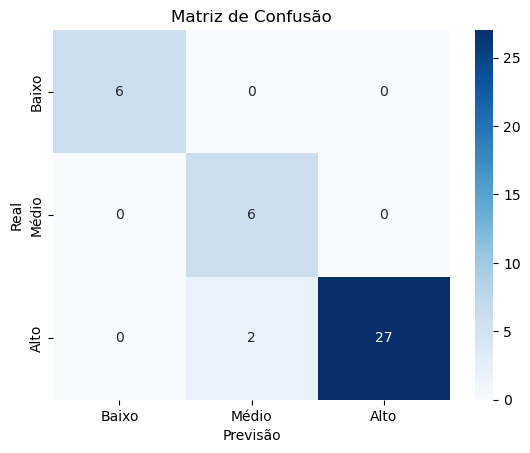

In [173]:
# Criando a matriz de confusão;
confusion_matrix = confusion_matrix(y_test, previoes_teste)

# Exibindo os dados da matriz em um gráfico;
sns.heatmap(
    confusion_matrix,
    annot=True,
    cmap="Blues",
    xticklabels=["Baixo", "Médio", "Alto"],
    yticklabels=["Baixo", "Médio", "Alto"]
)
plt.xlabel("Previsão")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

Observando a matriz de confusão nós podemos encontrar a classe exata onde ocorreram os erros de classificação. No nosso caso, o erro foi ocasionado pela classificação de duas amostras onde sua classe real era "Alto", porém, o modelo as classificou como "Médio".

---

Por fim, vamos criar um "relatório" com as principais métricas de precisão, para validar a confiabiliadade do modelo.

In [175]:
# Criando o relatório;
relatorio = classification_report(y_test, previoes_teste)

# Exibindo o relatório;
print(f"Relatório de métricas de precisão:\n"
      f"{relatorio}")

Relatório de métricas de precisão:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.75      1.00      0.86         6
           2       1.00      0.93      0.96        29

    accuracy                           0.95        41
   macro avg       0.92      0.98      0.94        41
weighted avg       0.96      0.95      0.95        41



Observando as métricas do relatório a cima, nós podemos ver que de fato, o modelo tem ótimos níveis de precisão. Entre as tres classes preditas, o modelo enfrentou maiores dificuldades na classificação de amostras pertencentes a classe 1 (Médio), pois essa foi a classe que apresentou os menores valores de precision (0.75) e f1-score (0.86), que mesmo sendo os valores mais baixos, ainda são relativamente altos.

---

## Vizualizando a estrutura da árvore

Vamos agora plotar a estrutura da Árvore de Decisão para vizualizarmos de forma gráfica cada fragmento da arvore. 

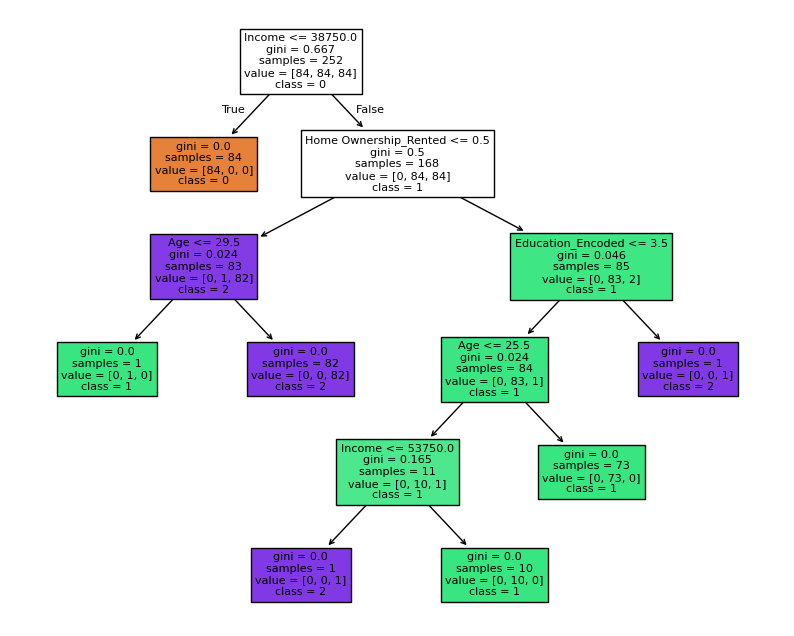

In [179]:
plt.figure(figsize=(10, 8))
plot_tree(tree_classifier, filled=True, feature_names=X_train.columns, class_names=["0", "1", "2"])
plt.show()

Observando a estrutura do modelo a cima nós podemos notar que estamos lidando com um modelo de profundidade 5. Podemos também entender de forma muito clara quais foram os testes lógicos que o algorítmo definiu em cada nó. Notamos também quais foram as features utilizadas em cada nível da árvore.

---

## Ranqueando as features por seus níveis de importância

Nessa etapa nós iremos verificar quais as features mais relevantes para o modelo e utilizaremos essa informação para estudar a possíbilidade de remover features com baixos níveis de importância.

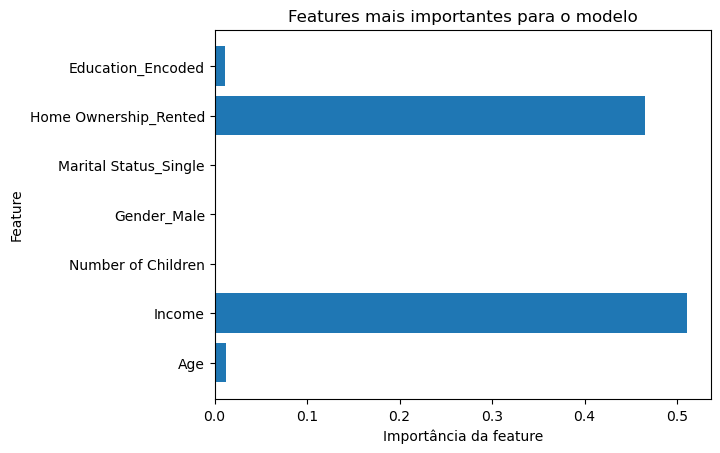

In [182]:
# Recebendo as informações das features;
feature_importances = tree_classifier.feature_importances_

# Definindo os nomes de cada feature;
feature_names = X_train.columns

# Plotando um gráfico de barras exibindo os níveis de importância;
plt.barh(feature_names, feature_importances)
plt.xlabel("Importância da feature")
plt.ylabel("Feature")
plt.title("Features mais importantes para o modelo")
plt.show()

Observando o gráfico a cima nós podemos ver que as duas features mais importantes para o modelo são "Income" e "Home Ownershio_Rented"!

---

## Treinando o modelo novamente

Nessa etapa nós iremos treinar um novo modelo e testar o seu desempenho. Nesse novo modelo nós utilizaremos apenas as duas features mais importantes, e após isso, vamos comparar o desempenho dos dois modelos. Para isso, primeiramente teremos que criar uma nova base de dados apenas com as duas features mais importantes, identificadas a cima.

In [186]:
# Criando a nova base de dados apenas com as features mais relevantes;
X_train_reduced = X_train[["Income", "Home Ownership_Rented"]]
X_test_reduced = X_test[["Income", "Home Ownership_Rented"]]

# Instanciando o modelo;
tree_classifier_reduced = DecisionTreeClassifier(criterion="gini", random_state=0)

# Treinando o modelo;
tree_classifier_reduced.fit(X_train_reduced, y_train)

DecisionTreeClassifier(random_state=0)

---
### Realizando predições e avaliando a precisão do novo modelo

Entramos na etapa de avaliação do novo modelo treinado com os dados reduzidos. Para iniciar essa etapa, vamos primeiramente realizar as predições e após isso vamos avaliar as métricas de precisão.


### Testando o modelo com a base de treino

Começaremos testando o modelo na base de treino, para termos uma referência de comparação com as métricas de precisão para a base de teste.

In [189]:
# Realizando as predições com o novo modelo na base de treino;
train_prediction_reduced = tree_classifier_reduced.predict(X_train_reduced)

# Verificando as métricas de precisão do modelo;
relatorio_reduced_train = classification_report(y_train, train_prediction_reduced)

# Exibindo o relatório;
print(f"Relatório de métricas de precisão na base de treino:\n"
       f"{relatorio_reduced_train}")

Relatório de métricas de precisão na base de treino:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       0.99      1.00      0.99        84
           2       1.00      0.99      0.99        84

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252



---
### Testando o modelo com a base de teste

Agora, iremos testar a precisão do modelo na base de testes.

In [191]:
# Realizando as predições com o novo modelo na base de testes;
test_prediction_reduced = tree_classifier_reduced.predict(X_test_reduced)

# Verificando as métricas de precisão do modelo;
relatorio_reduced_test = classification_report(test_prediction_reduced, y_test)

# Exibindo o relatório;
print(f"Relatório de métricas de precisão na base de teste:\n"
      f"{relatorio_reduced_test}")

Relatório de métricas de precisão na base de teste:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.83      0.83      0.83         6
           2       0.97      0.97      0.97        29

    accuracy                           0.95        41
   macro avg       0.93      0.93      0.93        41
weighted avg       0.95      0.95      0.95        41



Observando as métricas apresentadas no relatório a cima, podemos ver que o modelo também apresentou ótimos números na base de testes. Apesar de ter sido menos preciso em algumas métricas, isso já era esperado, devido a natureza desbalanceada e menos organizada que as bases de teste geralmente tem.

---
### Comparando os resultados do modelo com a base reduzida e o modelo com a base completa

Vamos agora comparar os resultados do modelo criado a partir da base completa e o modelo criado a partir da base reduzida, para entender se houve ou não um efeito positivo dessa redução.

**Modelo da base completa:**

In [195]:
# Criando o relatório;
relatorio = classification_report(y_test, previoes_teste)

# Exibindo o relatório;
print(f"Relatório de métricas de precisão do modelo com a nase completa:\n"
      f"{relatorio}")

Relatório de métricas de precisão do modelo com a nase completa:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.75      1.00      0.86         6
           2       1.00      0.93      0.96        29

    accuracy                           0.95        41
   macro avg       0.92      0.98      0.94        41
weighted avg       0.96      0.95      0.95        41



**Modelo da base reduzida:**

In [197]:
# Realizando as predições com o novo modelo na base de testes;
test_prediction_reduced = tree_classifier_reduced.predict(X_test_reduced)

# Verificando as métricas de precisão do modelo;
relatorio_reduced_test = classification_report(test_prediction_reduced, y_test)

# Exibindo o relatório;
print(f"Relatório de métricas de precisão na base de teste:\n"
      f"{relatorio_reduced_test}")

Relatório de métricas de precisão na base de teste:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.83      0.83      0.83         6
           2       0.97      0.97      0.97        29

    accuracy                           0.95        41
   macro avg       0.93      0.93      0.93        41
weighted avg       0.95      0.95      0.95        41



Observando as métricas dos dois relatórios, nós podemos notar que os dois modelos apresentaram números muito similares. Porém, apesar das semelhamças, o modelo com a base completa parece ter uma leve vantagem em métricas como f1-score e recall enquanto o modelo reduzido é levemente superior em precision. No fim do dia, o modelo da base completa apresentou resultados melhores em duas métricas (apesar de ser muito próximo do modelo da base reduzida) então nesse cenário, ele é o modelo superior.

---
## Comparando modelos - Árvore de Decisão VS Naive Bayes

Por fim, vamos comparar os resultados obtidos com o modelo de Árvore de Decisão e os resultados obtidos com o modelo Naiva Bayes.

Os resultados obtidos com o modelo da Árvore de Decisão foram:

In [201]:
# Criando o relatório;
relatorio = classification_report(y_test, previoes_teste)

# Exibindo o relatório;
print(f"Relatório de métricas de precisão do modelo com a nase completa:\n"
      f"{relatorio}")

Relatório de métricas de precisão do modelo com a nase completa:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.75      1.00      0.86         6
           2       1.00      0.93      0.96        29

    accuracy                           0.95        41
   macro avg       0.92      0.98      0.94        41
weighted avg       0.96      0.95      0.95        41



Enquanto os resultados obtidos a partir do modelo Naive Bayes foram:

![Naive Bayes](../naive_results.png)

Contrariando as expectativas, o modelo de Naive Bayes apresentou as melhores medidas de precisão para esse caso, apesar de os números serem muito semelhantes. Esse fato indica que **possivelmente a base de dados que estamos estudando possui uma baixíssima correlação entre as variáveis**, fazendo com que o modelo de Naive Bayes, que tem como base a pressuposição de independência entre variáveis, seja capaz de ter resultados tão precisos quanto, ou até mais precisos que o modelo da Árvore de decisão, que conhecidamente possui mais recursos adaptativos e é mais completo, por ser capaz de considerar as correlações entre features para chegar às suas predições.

---
### Validando a hipótese

Para validar a hipótese da possível motivação para o fato do modelo Naive Bayes ter sido superior ao modelo de Árvore de Decisão, vamos fazer uma rápida verificação da correlação entre as variáveis.

In [206]:
# Calculando a correlção entre variáveis;
base_completa = pd.concat([X_train, y_train])
corr = base_completa.corr()

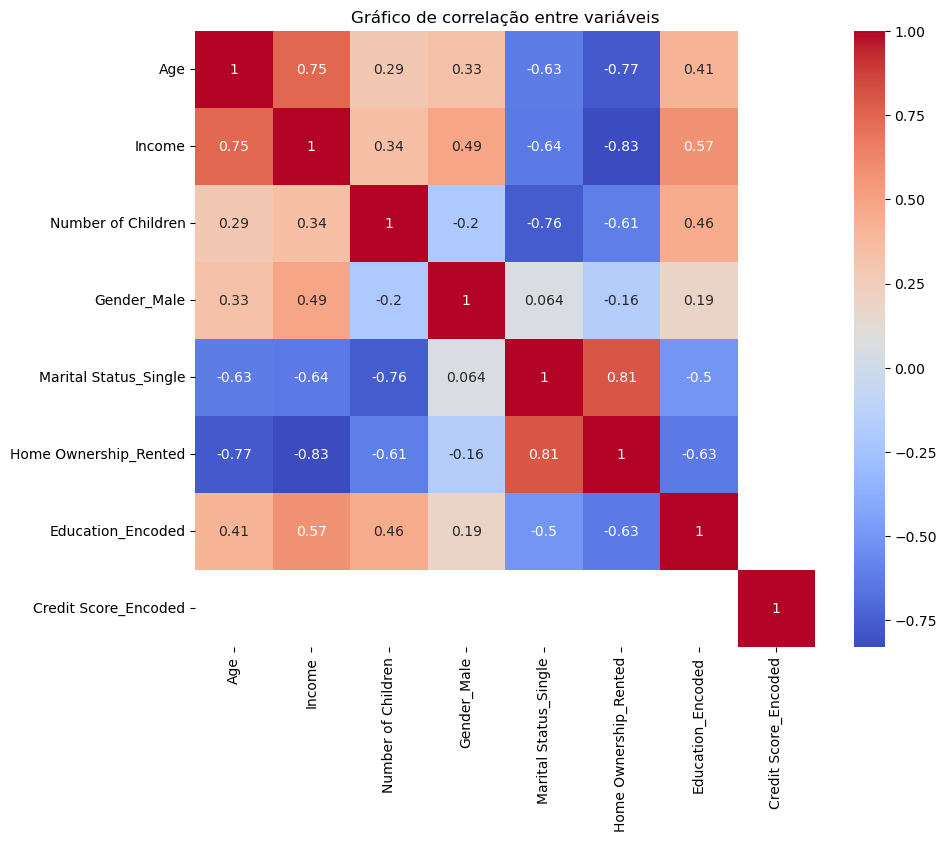

In [207]:
# Criando o gráfico de correlação
fig = plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Gráfico de correlação entre variáveis")
plt.show()

Observando o gráfico HeatMap da correlação entre variáveis a cima, podemos ver que existem correlações interessantes entre as variáveis independentes, chegando a valores de correlação de 0.81 e -0.83! Porém, ao olharmos para a variável a ser predita (Credit Score), a nossa hipótese se prova verdadeira, pois não existe nenhuma variável que possui uma correlação minimamente significativa com a mesma. Sendo assim, podemos dizer que o modelo Naive Bayes obteve melhores resultados devido ao fato de que o caso em que o aplicamos é perfeitamente compatível com ele.